# Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)

<hr style="border:0.1px solid gray"> </hr>



### Descrição da base de dados
Neste documento, encontra-se dados que constam a média mensal da remuneração líquida de servidores públicos ativos no Executivo Civil Federal. Os 88 (Oitenta e oito) indivíduos inclusos nesta pesquisa, que consta dados entre os anos 1999 e 2020, estão classificados em dois parâmetros: Sexo e Raça. 
As características supracitadas serão estudadas posteriormente para auxiliar numa análise exploratória desses dados.
Fonte: https://www.ipea.gov.br/atlasestado/filtros-series/28/vinculos-e-remuneracoes-por-sexo



## Definição dos dados
<hr style="border:0.1px solid gray"> </hr>

Primeiramente, é preciso importar as bibliotecas do Python que serão úteis desde a organização dos dados até a análise dos dados com auxílio de gráficos, como Pandas, NumPy, Matplotlib e Seaborn. 

Assim, logo usa-se o Pandas ('pd') para a leitura em DataFrame do arquivo a ser analisado.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
data = pd.read_csv('5233-liquidosexoraca (1).csv', sep=';', quotechar = '"', encoding= 'utf8')
data

,Unnamed: 0,ano,sexo_raça,liquido
0,1,1999,Homem Branco,"6527,2"
1,2,1999,Homem Negro,"4768,7"
2,3,1999,Mulher Branca,"5261,6"
3,4,1999,Mulher Negra,4010
4,5,2000,Homem Branco,"5690,3"
...,...,...,...,...
83,84,2019,Mulher Negra,"5996,2"
84,85,2020,Homem Branco,"8774,2"
85,86,2020,Homem Negro,"6272,2"
86,87,2020,Mulher Branca,"7753,8"


In [3]:
# Para melhor visualização adiante, retirei a primeira coluna
data = data[['ano', 'sexo_raça', 'liquido']]
data.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"


In [17]:
data.head() #Esse comando é usado para ver apenas o início dos DataFrames

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"


### Dicionário de dados
A seguir, consta um dicionário de dados, no qual há um DataFrame nomeado como "dicionario" que contém as variáveis e seus respectivos nomes, descrições e classificações com o intuito de elucidar o que está contido dentro do dataset a ser analisado. O objetivo principal é prover um melhor entendimento sobre os dados fornecidos.

In [18]:

dicionario = {'Nome da variável' : [ 'Ano', 'Sexo e Raça', 'Salário Liquido'],
                'Tipo de variavel' : ['Numérico', 'Nominal','Numérico'],
                'Descrição da variável' : ['Ano da coleta', 'Sexo e Raça do indivíduo', 'Salário liquido mensal do indivíduo']
             }
dicionario = pd.DataFrame(data = dicionario)
dicionario

,Nome da variável,Tipo de variavel,Descrição da variável
0,Ano,Numérico,Ano da coleta
1,Sexo e Raça,Nominal,Sexo e Raça do indivíduo
2,Salário Liquido,Numérico,Salário liquido mensal do indivíduo


## Preparação dos dados
<hr style="border:0.1px solid gray"> </hr>

Nesta etapa, os dados devem ser bem organizados e limpos, ou seja, será feito a eliminação de duplicações ou outliers e de valores ausentes.

A seguir foi utilizado um recurso do Pandas que remove os valores nulos, ou seja, os valores ausentes do DataFrame. Esses valores são nomeados como 'NaN' (Not a Number).

In [19]:
data.isnull()

,ano,sexo_raça,liquido
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
83,False,False,False
84,False,False,False
85,False,False,False
86,False,False,False


Ao executar essa função, verifica-se os dados nulos em cada coluna. Assim, ao ver o valor booleano "False" quer dizer que há dados atribuidos, se houver "True", não há dados.

In [20]:
data.isnull().sum() #Aqui, conta-se a quantidade de números ausentes

ano          0
sexo_raça    0
liquido      0
dtype: int64

Portanto, vemos que não há valores ausentes nas colunas.

In [21]:
data.duplicated() 
#Para verificar se há dados duplicados, se houver algum dado duplicado, aparecerá "True".

0     False
1     False
2     False
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Length: 88, dtype: bool

In [22]:
data = data.dropna()  
data

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"
...,...,...,...
83,2019,Mulher Negra,"5996,2"
84,2020,Homem Branco,"8774,2"
85,2020,Homem Negro,"6272,2"
86,2020,Mulher Branca,"7753,8"


Vemos que não há dados duplicados. Assim, com dados limpos, seguimos para a análise desses dados.

# Análise exploratória de dados
<hr style="border:0.1px solid gray"> </hr>




### Há alguma discrepância na remuneração mensal quando compara-se a média salarial de cada grupo?


In [39]:
data.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,6527.2
1,1999,Homem Negro,4768.7
2,1999,Mulher Branca,5261.6
3,1999,Mulher Negra,4010.0
4,2000,Homem Branco,5690.3


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ano        88 non-null     int64 
 1   sexo_raça  88 non-null     object
 2   liquido    88 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


Ao verificar os tipos de cada variável nas colunas, vemos que 'sexo_raça' e 'liquido' são lidas como objetos. No entanto, a variável 'liquido' precisa ser reocnhecida como um tipo numérico com casa decimal, para que a analise a ser feita não seja prejudicada. 

In [6]:
data['liquido'] = data['liquido'].str.replace(',','.').astype(float)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_14784\3596951436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['liquido'] = data['liquido'].str.replace(',','.').astype(float)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        88 non-null     int64  
 1   sexo_raça  88 non-null     object 
 2   liquido    88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


A seguir, iremos juntar todos os dados contido nos 4 tipos de 'sexo_raça' classificados e observar, em média, a remuneração de cada um.  

In [9]:
A1 = data.groupby(['sexo_raça'])['liquido'].mean().reset_index()
A1['liquido'] = round(A1['liquido'],2) 
A1

,sexo_raça,liquido
0,Homem Branco,7738.23
1,Homem Negro,5460.00
2,Mulher Branca,6718.90
3,Mulher Negra,5066.83


Text(0.5, 1.0, 'Remuneração Média (Real) de invidívuos do setor público tendo como parâmetro Raça e Sexo ')

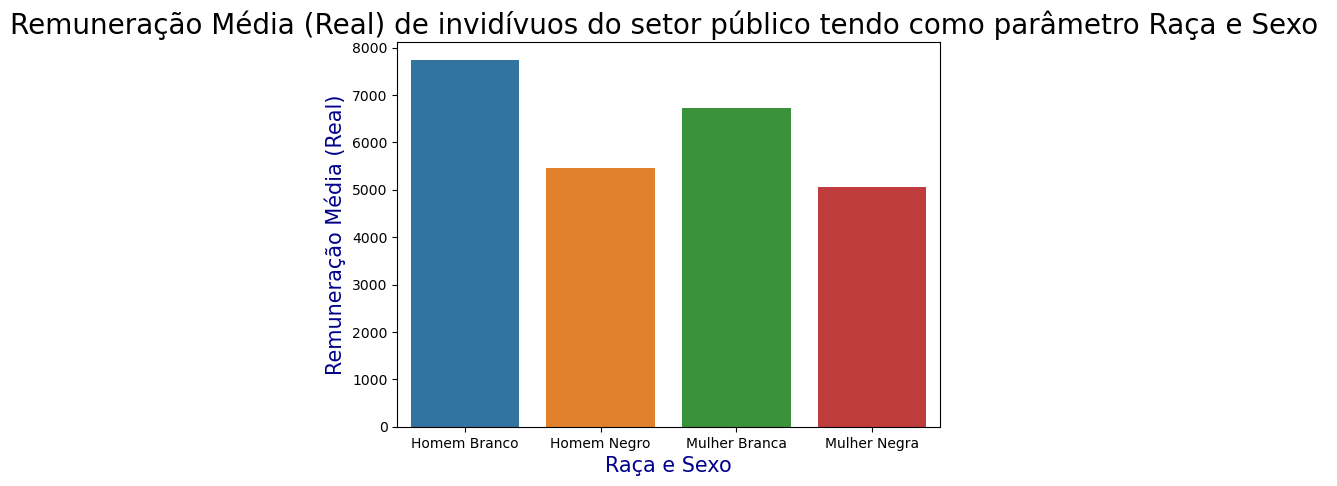

In [18]:
#Com os dados obtidos, será gerado um gráfico
f, ax1 = plt.subplots(figsize=(7, 5))
ax1 = sns.barplot(data = A1 ,x= 'sexo_raça', y='liquido')
plt.xlabel('Raça e Sexo', color = 'darkblue', size = 15)
plt.ylabel('Remuneração Média (Real)', color = 'darkblue', size = 15)
plt.title('Remuneração Média (Real) de invidívuos do setor público tendo como parâmetro Raça e Sexo ', size = 20)

Observa-se que a média salarial entre os indivíduos acima, de acordo com tais parâmetros (Raça e Sexo), entre os anos 1999 e 2000, evidencia-se que homens brancos possuem, com uma grande vantagem, uma média salarial maior em relação aos demais.
Vemos que há uma discrepância bastante significativa quando se compara a média salarial de homens brancos com a de mulheres negras. Está exposto que mesmo havendo mulheres negras capazes de exercer funções no mesmo cargo que um homem branco, o mercado de trabalho as subestima. Assim como o gênero é visto explicitamente como um fator não favorável, a raça também é um outro paramâmetro a se considerar, pois vemos que mesmo sendo homem, a média salarial de homems negros é surpreendentemente menor que a de mulheres brancas.


A cultura machista e racista afeta uma grande parcela da população que não se encaixa nos padrões historicamente instaurados na nossa sociedade, observamos frequentemente como a desigualdade entre raça e gênero podem ser um aspecto que determina como essas pessoas vão ser inseridas no mercado de trabalho, quais cargos ocuparam e quais serão seus salários. Esses fatores de discriminação são vistos quando a participação de homens brancos no mercado de trabalho é elevado em comparação com a atuação de mulheres, e quando comparados a homens e mulheres negras essa diferença se destaca ainda mais. Por isso, os dados são importantes para comprovar que a reprodução de tais aos racistas e sexistas.


  No Brasil, as desigualdades de gênero e raça não são fenômenos que estão referidos a "minorias" ou a grupos específicos da sociedade. Pelo contrário, são problemas que dizem respeito às grandes maiorias da população: segundo os dados da Pesquisa Nacional por Amostra de Domicílios (PNAD) 2003, as mulheres representam 43% da População Economicamente Ativa (PEA) no Brasil e os negros (de ambos os sexos) representam 46%. Somados, correspondem a aproximadamente 70% da PEA (60 milhões de pessoas). As mulheres negras, por sua vez, correspondem a mais de 15 milhões de pessoas (18% da PEA) e, como resultado de uma dupla discriminação (de gênero e raça), apresentam uma situação de sistemática desvantagem em todos os principais indicadores sociais e de mercado de trabalho (ABRAMO, LAÍS 2006).


### A tendência ao longo dos anos entre indivíduos de sexo e raça distintas


In [87]:
data.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,6527.2
1,1999,Homem Negro,4768.7
2,1999,Mulher Branca,5261.6
3,1999,Mulher Negra,4010.0
4,2000,Homem Branco,5690.3


In [24]:
homembranco = data.loc[data['sexo_raça']== 'Homem Branco']

In [50]:
homembranco #separando em um dataframe todos os dados referentes aos homens brancos

,ano,sexo_raça,liquido
0,1999,Homem Branco,6527.2
4,2000,Homem Branco,5690.3
8,2001,Homem Branco,5833.8
12,2002,Homem Branco,6407.0
16,2003,Homem Branco,6133.3
20,2004,Homem Branco,5902.9
24,2005,Homem Branco,6314.4
28,2006,Homem Branco,6227.3
32,2007,Homem Branco,7049.0
36,2008,Homem Branco,7220.2


In [20]:
mulhernegra = data.loc[data['sexo_raça']== 'Mulher Negra']

In [51]:
mulhernegra #separando em um dataframe todos os dados referente as mulheres negras

,ano,sexo_raça,liquido
3,1999,Mulher Negra,4010.0
7,2000,Mulher Negra,3782.5
11,2001,Mulher Negra,3734.5
15,2002,Mulher Negra,4069.7
19,2003,Mulher Negra,3856.7
23,2004,Mulher Negra,3862.0
27,2005,Mulher Negra,4036.4
31,2006,Mulher Negra,3958.6
35,2007,Mulher Negra,4311.5
39,2008,Mulher Negra,4352.3


<AxesSubplot:title={'center':'Salário de Mulheres negras entre 1999 e 2020'}, xlabel='Anos', ylabel='Remuneração em Real'>

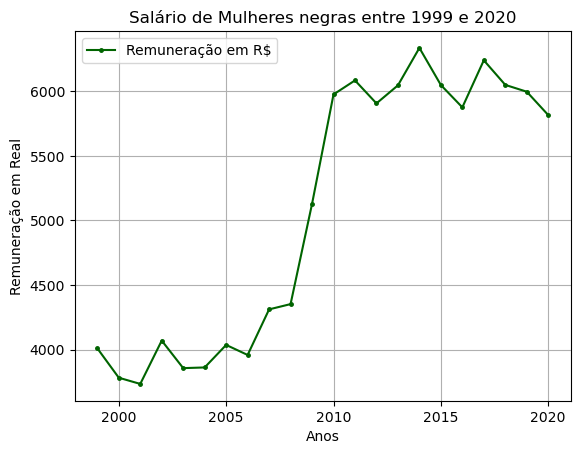

In [82]:
mulhernegra.plot(x = "ano", y = "liquido",
          grid = True,
          legend = True, label = 'Remuneração em R$',
          marker = ".",
          markersize = 5,
          colormap = "viridis",
          xlabel = "Anos",  color= 'darkgreen',
          ylabel= "Remuneração em Real",
          title = "Salário de Mulheres negras entre 1999 e 2020")

<AxesSubplot:title={'center':'Salário de Homens brancos entre 1999 e 2020'}, xlabel='Anos', ylabel='Remuneração em Real'>

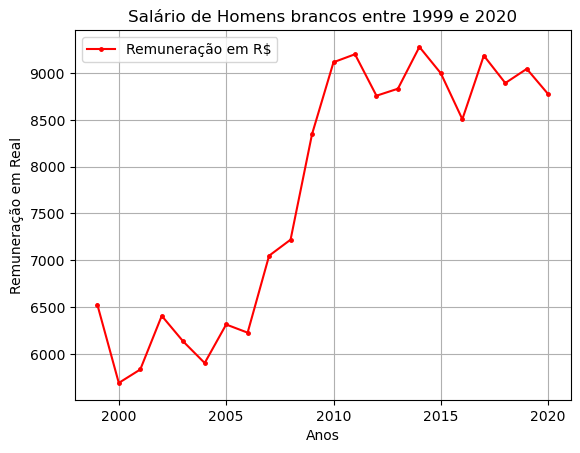

In [79]:
homembranco.plot(x = "ano", y = "liquido",
          grid = True,
          legend = True, label = 'Remuneração em R$',
          marker = ".", 
          color= 'red',
          markersize = 5, 
          xlabel = "Anos", 
          ylabel= "Remuneração em Real",
          title = "Salário de Homens brancos entre 1999 e 2020")

No ambiente executivo civil federal, no intervalo de anos 2004-2015 houve um pico de aumento salarial para mulheres negras e homens brancos, entretanto, o gráfico ainda nos mostra que a desigualdade salarial permanece. O homem passou a ganhar cada vez mais, resultando posteriormente, em 2020, em um salário acima de R$8.500,00, enquanto as mulheres negras não possuem uma remuneração acima de R$6.000,00

De acordo com o MEC, em 2004, surgiu um projeto para a implementação de cotas e em 2012, a lei foi sancionada. Isso explica o pico entre os anos supracitados e, assim, foi possibilitado a entrada de pessoas negras na universidade, o que contribuiu para o aumento dos salários de todos, incluindo as mulheres negras.

Isso mostra que mesmo tendo quase 10 anos de políticas afirmativas, viabilizando que pessoas negras estejam ocupando espaços, os quais antes a maioria composta por homens brancos, não foi suficiente para reparar historicamente a desigualdade de gênero e, principalmente, raça. Por fim, mostra-se que cada vez mais temos que lutar para que políticas no mercado de trabalho sejam criadas para que essa discrepância na remuneração salarial diminua e ocorra mudanças efetivas.


Fonte: http://portal.mec.gov.br/component/tags/tag/politica-de-cotas